In [1]:
import pandas as pd

In [2]:
pip install yfinance

You should consider upgrading via the '/Users/marielyngholm/.pyenv/versions/3.8.12/envs/lewagon/bin/python3.8 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import yfinance as yf

sp500 = yf.Ticker("^GSPC")

In [4]:
sp500 = sp500.history(period="max")

In [5]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1950-01-03,16.660000,16.660000,16.660000,16.660000,1260000,0,0
1950-01-04,16.850000,16.850000,16.850000,16.850000,1890000,0,0
1950-01-05,16.930000,16.930000,16.930000,16.930000,2550000,0,0
1950-01-06,16.980000,16.980000,16.980000,16.980000,2010000,0,0
1950-01-09,17.080000,17.080000,17.080000,17.080000,2520000,0,0
...,...,...,...,...,...,...,...
2022-07-11,3880.939941,3880.939941,3847.219971,3854.429932,3023830000,0,0
2022-07-12,3851.949951,3873.409912,3802.360107,3818.800049,0,0,0
2022-07-13,3779.669922,3829.439941,3759.070068,3801.780029,3166580000,0,0


In [6]:
sp500.index

DatetimeIndex(['1950-01-03', '1950-01-04', '1950-01-05', '1950-01-06',
               '1950-01-09', '1950-01-10', '1950-01-11', '1950-01-12',
               '1950-01-13', '1950-01-16',
               ...
               '2022-07-01', '2022-07-05', '2022-07-06', '2022-07-07',
               '2022-07-08', '2022-07-11', '2022-07-12', '2022-07-13',
               '2022-07-14', '2022-07-15'],
              dtype='datetime64[ns]', name='Date', length=18252, freq=None)

 ## Cleaning data

<AxesSubplot:xlabel='Date'>

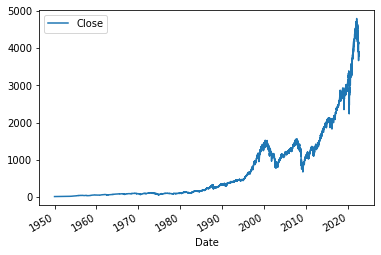

In [7]:
sp500.plot.line(y="Close", use_index=True)

In [8]:
del sp500["Dividends"]
del sp500["Stock Splits"]

#### Will the price go up or down tomorrow?

In [9]:
 sp500["Tomorrow"] = sp500["Close"].shift(-1)

In [10]:
 sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)

In [11]:
 sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1950-01-03,16.660000,16.660000,16.660000,16.660000,1260000,16.850000,1
1950-01-04,16.850000,16.850000,16.850000,16.850000,1890000,16.930000,1
1950-01-05,16.930000,16.930000,16.930000,16.930000,2550000,16.980000,1
1950-01-06,16.980000,16.980000,16.980000,16.980000,2010000,17.080000,1
1950-01-09,17.080000,17.080000,17.080000,17.080000,2520000,17.030001,0
...,...,...,...,...,...,...,...
2022-07-11,3880.939941,3880.939941,3847.219971,3854.429932,3023830000,3818.800049,0
2022-07-12,3851.949951,3873.409912,3802.360107,3818.800049,0,3801.780029,0
2022-07-13,3779.669922,3829.439941,3759.070068,3801.780029,3166580000,3790.379883,0


In [12]:
sp500 = sp500.loc["1990-01-01":].copy()

In [13]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2022-07-11,3880.939941,3880.939941,3847.219971,3854.429932,3023830000,3818.800049,0
2022-07-12,3851.949951,3873.409912,3802.360107,3818.800049,0,3801.780029,0
2022-07-13,3779.669922,3829.439941,3759.070068,3801.780029,3166580000,3790.379883,0


### Training an initial ML model

In [14]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)


# All rows except the last 100 into the training set
train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [15]:
from sklearn.metrics import precision_score

# What percentage of the time did the market actually go up when we said it would go up?

preds = model.predict(test[predictors])

In [16]:
preds = pd.Series(preds, index=test.index)
preds

Date
2022-02-22    1
2022-02-23    1
2022-02-24    1
2022-02-25    1
2022-02-28    1
             ..
2022-07-11    1
2022-07-12    1
2022-07-13    1
2022-07-14    1
2022-07-15    1
Length: 100, dtype: int64

In [17]:
precision_score(test["Target"], preds)

0.45555555555555555

In [18]:
combined = pd.concat([test["Target"], preds], axis=1)

<AxesSubplot:xlabel='Date'>

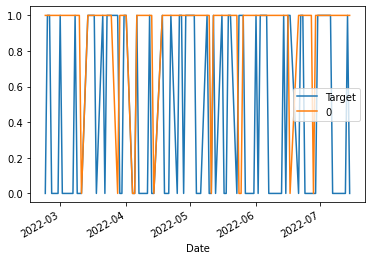

In [19]:
combined.plot()

In [20]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [21]:
def backtest(data, model, predictors, start=2500, step=250):
    
    all_predictions = []
    
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [26]:
predictions = backtest(sp500, model, predictors, start=2500, step=250)
predictions

,Target,Predictions
Date,,
1999-11-22,0,0
1999-11-23,1,0
1999-11-24,0,0
1999-11-26,0,0
1999-11-29,0,0
...,...,...
2022-07-11,0,1
2022-07-12,0,1
2022-07-13,0,1


In [27]:
predictions["Predictions"].value_counts()

0    3329
1    2369
Name: Predictions, dtype: int64

In [28]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5348248205994091

In [43]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5708955223880597

In [32]:
# Is that good enough? Lets look at the value counts of the target

predictions["Target"].value_counts() / predictions.shape[0] * 100

1    53.632854
0    46.367146
Name: Target, dtype: float64

### Adding additional predictors

In [33]:
horizons = [2,5,60, 250,1000]

new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]
    
    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]
    
    new_predictors += [ratio_column, trend_column]

In [34]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1990-01-02,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0,0.998706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0,0.995675,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1,0.995098,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0,1.002252,1.0,0.993731,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-11,3880.939941,3880.939941,3847.219971,3854.429932,3023830000,3818.800049,0,0.994203,0.0,0.996858,3.0,0.956528,28.0,0.878269,127.0,1.103445,548.0
2022-07-12,3851.949951,3873.409912,3802.360107,3818.800049,0,3801.780029,0,0.995357,0.0,0.988286,2.0,0.950153,27.0,0.870591,126.0,1.092927,548.0
2022-07-13,3779.669922,3829.439941,3759.070068,3801.780029,3166580000,3790.379883,0,0.997767,0.0,0.986092,1.0,0.948241,27.0,0.867152,126.0,1.087746,547.0


In [37]:
sp500 = sp500.dropna()
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-08,3888.260010,3918.500000,3869.340088,3899.379883,2844620000,3854.429932,0,0.999585,1.0,1.010003,4.0,0.965514,28.0,0.888094,127.0,1.116649,548.0
2022-07-11,3880.939941,3880.939941,3847.219971,3854.429932,3023830000,3818.800049,0,0.994203,0.0,0.996858,3.0,0.956528,28.0,0.878269,127.0,1.103445,548.0
2022-07-12,3851.949951,3873.409912,3802.360107,3818.800049,0,3801.780029,0,0.995357,0.0,0.988286,2.0,0.950153,27.0,0.870591,126.0,1.092927,548.0


### Improving the model

In [59]:
model = RandomForestClassifier(n_estimators=50, min_samples_split=100, random_state=1)

In [60]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >= 0.6] = 1 
    preds[preds < 0.6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [61]:
predictions = backtest(sp500, model, new_predictors)

In [62]:
predictions["Predictions"].value_counts()

0.0    3862
1.0     835
Name: Predictions, dtype: int64

In [63]:
precision_score(predictions["Target"], predictions["Predictions"])

0.577245508982036

## Improve

- gridsearch on randomforest
- timeseries ARIMA
- fb prophet